In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.cross_validation import train_test_split as tts
from sklearn.model_selection import GridSearchCV as cv
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

In [5]:
### Load Data ###
train_orig = pd.read_csv('train.csv')
test_orig = pd.read_csv('test.csv')

In [3]:
### Quick Look ###
train_orig.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [23]:
train_orig.shape

(188318, 132)

In [9]:
### preprocess ###
concatdf = test_orig.append(train_orig)
#train = train.replace(to_replace='A', value=0)
#train = train.replace(to_replace='B', value=1)
resp = train_orig.columns[-1]
features_cat = train_orig.columns[1:-15]
features_orig = train_orig.columns[1:]

#enc = OneHotEncoder(categorical_features=features_cat,)
#enc = enc.fit(concatdf[features_orig])

#train = enc.transform(train_orig[features_orig])

dv = DictVectorizer(sparse=False) 
concatdf_num = concatdf[features_orig].to_numeric()
concatdf_num_tf = dv.fit_transform(concatdf_num.to_dict(orient='records'))

#df = pd.get_dummies(train_orig[features_orig])
#features = df.columns
#df = df.merge(train_orig[resp].to_frame(), how='inner', left_index=True, right_index=True)
#train, test = tts(df, test_size = 0.2)

/Users/johndean/Documents/Kaggle/kenv/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [12]:
concatdf_num_tf

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.12290000e-01,   3.43650000e-01,              nan],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          7.13300000e-01,   5.18900000e-01,              nan],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.97580000e-01,   3.43650000e-01,              nan],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.45640000e-01,   4.58080000e-01,   5.76264000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.49870000e-01,   4.47670000e-01,   1.56287000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          9.71230000e-01,   9.33830000e-01,   4.75172000e+03]])

In [ ]:
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(threshold=20)

In [22]:
print(np.array(features))

['cat1' 'cat2' 'cat3' ..., 'cont12' 'cont13' 'cont14']


In [55]:
n_estimators = 100
learning_rate = 0.1
model = gbr(n_estimators=n_estimators, learning_rate=learning_rate, verbose = 1)
model = model.fit(train[features],train[resp])

      Iter       Train Loss   Remaining Time 
         1     7885146.1038           11.77m
         2     7434818.5430           10.58m
         3     7044986.7347            9.73m
         4     6738327.1314            9.47m
         5     6457143.7747            9.14m
         6     6234565.9391            9.12m
         7     6023313.1854            8.84m
         8     5856179.1188            8.82m
         9     5696519.2558            8.59m
        10     5560621.0603            8.38m
        20     4760018.4838            7.05m
        30     4378873.2900            6.37m
        40     4138791.0554            5.78m
        50     3980236.2859            4.90m
        60     3871687.1090            4.02m
        70     3786913.4632            3.29m
        80     3722323.3479            2.15m
        90     3670185.4060            1.06m
       100     3630331.8604            0.00s


In [56]:
### Source: DataRobot.com
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', 
                  test_color='#d7191c', alpha=1.0, ylim=(0, 10)):
    """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize=(11, 7))
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim(0.95*np.array(est.train_score_).min(),np.array(test_dev).max())
    return test_dev, ax

/Users/johndean/Documents/Kaggle/kenv/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


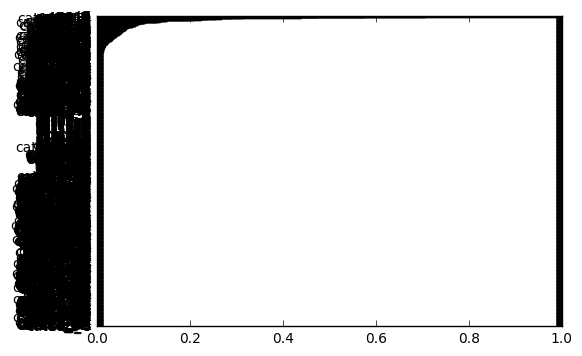

In [49]:
# Feature Importance
fx_imp = pd.Series(model.feature_importances_, index = features)
fx_imp /= fx_imp.max()  # normalize
fx_imp.sort()
fx_imp.plot(kind='barh')
plt.show()

In [63]:
feature_feedback = pd.Series(model.feature_importances_, index = features)

In [66]:
feature_feedback.mean(),feature_feedback.std(),feature_feedback.median()

(0.00086730268863833475, 0.0054325982566326408, 0.0)

In [98]:
features2 = feature_feedback[feature_feedback > 0.005].index
features3 = feature_feedback[feature_feedback > 0.001].index
len(features3)

105

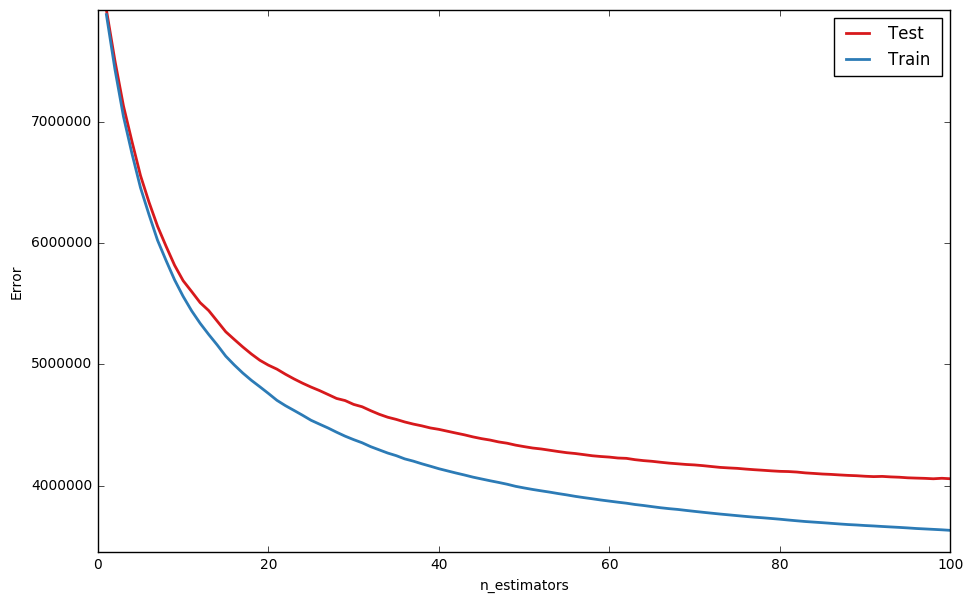

In [57]:
# DEV PLOT
test_dev, ax = deviance_plot(model,
                             test[features],
                             test[resp])
ax.legend(loc='upper right')
plt.show()

In [58]:
### Evaluate ###
test['pred'] = model.predict(test[features])

/Users/johndean/Documents/Kaggle/kenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [61]:
score = sum(abs(test['pred']-test[resp]))/len(test)
score

1265.8747706216598

In [78]:
### Try 2 ###
n_estimators = 100
learning_rate = 0.1
model2 = gbr(n_estimators=n_estimators, learning_rate=learning_rate, verbose = 1)
model2 = model2.fit(train[features2],train[resp])

      Iter       Train Loss   Remaining Time 
         1     7885146.1038           46.73s
         2     7434818.5430           45.88s
         3     7044986.7347           43.47s
         4     6738327.1314           43.26s
         5     6457143.7747           42.61s
         6     6235290.6118           43.21s
         7     6024030.7312           42.53s
         8     5857475.7970           42.61s
         9     5697771.4642           41.76s
        10     5561850.9884           40.96s
        20     4762017.3433           36.96s
        30     4384414.4346           32.80s
        40     4153385.7567           27.55s
        50     3998247.4172           22.85s
        60     3883553.2669           18.24s
        70     3801411.5789           13.58s
        80     3738985.2227            8.95s
        90     3690591.6270            4.42s
       100     3652017.2734            0.00s


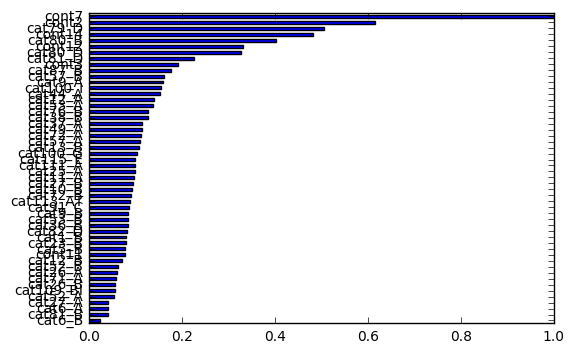

In [79]:
# Feature Importance
fx_imp = pd.Series(model2.feature_importances_, index = features2)
fx_imp /= fx_imp.max()  # normalize
fx_imp.sort_values(inplace=True)
fx_imp.plot(kind='barh')
plt.show()

In [80]:
### Evaluate ###
test['pred2'] = model2.predict(test[features2])
score2 = sum(abs(test['pred2']-test[resp]))/len(test)
score2

/Users/johndean/Documents/Kaggle/kenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1268.4678373813424

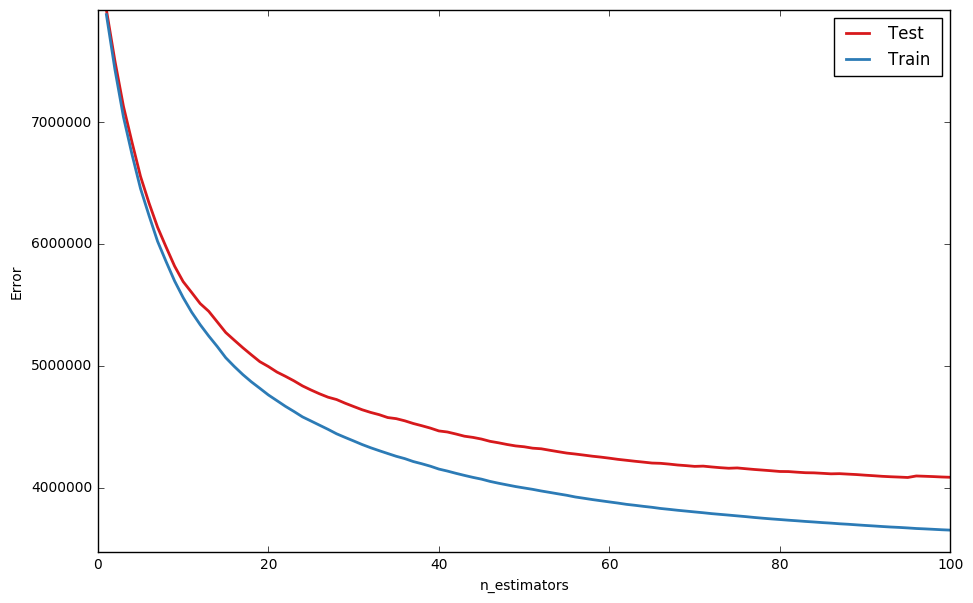

In [81]:
# DEV PLOT
test_dev, ax = deviance_plot(model2,
                             test[features2],
                             test[resp])
ax.legend(loc='upper right')
plt.show()

In [83]:
help(gbr)

Help on class GradientBoostingRegressor in module sklearn.ensemble.gradient_boosting:

class GradientBoostingRegressor(BaseGradientBoosting, sklearn.base.RegressorMixin)
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
 |      loss function to be optimized. 'ls' refers to least squares
 |      regression. 'lad' (least absolute deviation) is a highly robust
 |      loss function solely based on order information of the input
 |      variables. 'huber' is a combination of the two. 'quantile'
 |      allows quantile regression (use `alpha` to specify the quantile).
 |  
 |  learning_rate

In [84]:
help(cv)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

In [112]:
### Grid Search ###
param_grid = {'max_depth':[9], 'max_features':[17,19,21], 'min_samples_split':[6,8,10]}
modelcv = gbr(n_estimators=100,learning_rate=0.1)
clf = cv(estimator=modelcv, param_grid=param_grid, n_jobs=3)
clf_fit = clf.fit(train[features3],train[resp])
clf_fit.best_params_

{'max_depth': 9, 'max_features': 17, 'min_samples_split': 6}

In [113]:
clf_fit.best_params_

{'max_depth': 9, 'max_features': 17, 'min_samples_split': 6}

In [114]:
clf_fit.grid_scores_

/Users/johndean/Documents/Kaggle/kenv/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.56636, std: 0.00774, params: {'max_features': 17, 'min_samples_split': 6, 'max_depth': 9},
 mean: 0.56454, std: 0.00977, params: {'max_features': 17, 'min_samples_split': 8, 'max_depth': 9},
 mean: 0.56617, std: 0.00583, params: {'max_features': 17, 'min_samples_split': 10, 'max_depth': 9},
 mean: 0.56205, std: 0.00845, params: {'max_features': 19, 'min_samples_split': 6, 'max_depth': 9},
 mean: 0.56379, std: 0.00715, params: {'max_features': 19, 'min_samples_split': 8, 'max_depth': 9},
 mean: 0.56405, std: 0.01042, params: {'max_features': 19, 'min_samples_split': 10, 'max_depth': 9},
 mean: 0.56300, std: 0.01077, params: {'max_features': 21, 'min_samples_split': 6, 'max_depth': 9},
 mean: 0.56295, std: 0.01265, params: {'max_features': 21, 'min_samples_split': 8, 'max_depth': 9},
 mean: 0.56345, std: 0.00819, params: {'max_features': 21, 'min_samples_split': 10, 'max_depth': 9}]

In [115]:
### Try 3 ###
n_estimators = 800
learning_rate = 0.01
max_depth = 9 #7
max_features = 17 #11
min_samples_split = 6 #6
model3 = gbr(n_estimators=n_estimators, learning_rate=learning_rate,
             max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split,
             verbose = 1)
model3 = model3.fit(train[features3],train[resp])

      Iter       Train Loss   Remaining Time 
         1     8350462.5895           22.18m
         2     8270836.2842           22.02m
         3     8192676.9088           21.59m
         4     8116149.1859           21.54m
         5     8042977.3650           21.94m
         6     7969841.9040           22.56m
         7     7896253.7770           22.70m
         8     7823726.4761           22.60m
         9     7753179.2344           22.44m
        10     7683131.8427           22.04m
        20     7052374.4388           21.74m
        30     6514796.7942           21.68m
        40     6066695.8212           21.34m
        50     5679142.4314           21.18m
        60     5348627.6747           20.77m
        70     5066406.7831           20.47m
        80     4821982.0275           20.16m
        90     4606143.2984           19.97m
       100     4423360.5518           19.71m
       200     3437901.3315           16.85m
       300     3059447.5763           14.19m
       40

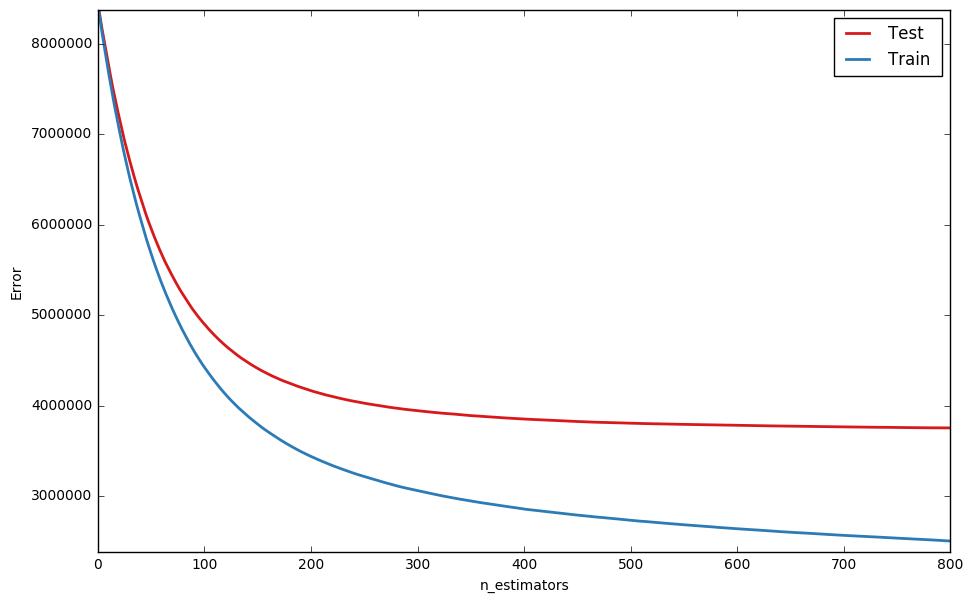

In [116]:
# DEV PLOT
test_dev, ax = deviance_plot(model3,
                             test[features3],
                             test[resp])
ax.legend(loc='upper right')
plt.show()

In [117]:
### Evaluate ###
test['pred3'] = model3.predict(test[features3])
score3 = sum(abs(test['pred3']-test[resp]))/len(test)
score3

/Users/johndean/Documents/Kaggle/kenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1204.3046449690989